### データサイエンスプログラミング2　最終課題

本課題では本課題ではテーマを交通にし、具体的には関東エリアの鉄道の運行情報をスクレイピングし、遅延リスクの高い路線を絞りリスクを回避する目的で行う。

### 1.遅延情報をスクレイピング

In [1]:

pip install selenium bs4


Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
import time
from bs4 import BeautifulSoup

In [5]:
response = requests.get(URL, headers=headers)
print("status code:", response.status_code)



status code: 200


In [6]:
print(response.text[:1000])  # 先頭1000文字



<!DOCTYPE html>
<html lang="ja">
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>山手線（関東エリア）の運行情報・運休情報：JR東日本</title>
    <meta name="description" content="">
    <meta name="keywords" content="">
    <meta name="robots" content="index,follow">
    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">
    <meta name="format-detection" content="telephone=no">

    <meta property="og:title" content="山手線（関東エリア）の運行情報・運休情報：JR東日本">
    <meta property="og:description" content="">
    <meta property="og:type" content="website">
    <meta property="og:url" content="https://traininfo.jreast.co.jp/train_info/line.aspx?gid=1&amp;lineid=yamanoteline">
    <meta property="og:site_name" content="JR東日本：東日本旅客鉄道株式会社">

    <link rel="shortcut icon" href="https://www.jreast.co.jp/favicon.ico">
    <link rel="canonical" href="https://traininfo.jreast.co.jp/train_info/">

    <!--共通CSS-->
    <link re


In [46]:
# In[1]:

import time
from selenium import webdriver
from bs4 import BeautifulSoup

def scrape_delay_from_line(line_id):
    """
    指定された line_id を使ってURLを生成し、
    Seleniumでアクセス → 遅延証明書履歴を取得する。
    戻り値: [{'date': "...", 'delay_time': "...", 'line': line_id}, ...]
    """
    base_url = "https://traininfo.jreast.co.jp/train_info/line.aspx?gid=1&lineid="
    url = base_url + line_id

    driver = webdriver.Chrome()
    driver.implicitly_wait(10)

    try:
        driver.get(url)
        # JS描画待ち(適宜調整)
        time.sleep(3)

        html = driver.page_source
    finally:
        driver.quit()

    soup = BeautifulSoup(html, "html.parser")

    table_div = soup.find("div", class_="basicTable02 tdCenter delayTable mb50 accMore_cont")
    if not table_div:
        print(f"対象のdivが見つかりません（路線: {line_id}）")
        return []

    table = table_div.find("table")
    if not table:
        print(f"テーブルが見つかりません（路線: {line_id}）")
        return []

    tbody = table.find("tbody")
    if not tbody:
        print(f"tbodyが見つかりません（路線: {line_id}）")
        return []

    rows = tbody.find_all("tr")
    result = []

    for row in rows:
        tds = row.find_all("td")
        if not tds:
            continue

        date_text = tds[0].get_text(strip=True)
        # 2列目以降に "delay" クラスがあれば遅延時間
        for i in range(1, len(tds)):
            td = tds[i]
            if "delay" in td.get("class", []):
                link_tag = td.find("a", class_="link_delay")
                if link_tag:
                    # "別ウィンドウで開きます" を除去
                    delay_time = link_tag.get_text(strip=True).replace("別ウィンドウで開きます", "").strip()
                    result.append({
                        "date": date_text,
                        "delay_time": delay_time,
                        "line": line_id
                    })
    return result

# 取得したい路線IDのリスト
line_ids = [
    "tokaidoline",
    "yokosukaline",
    "keihin-tohokuline",
    "yokohamaline",
    "nambuline",
    "yamanoteline",
    "chuoline",
    "chuo_sobuline_local",
    "omeline",
    "itsukaichiline",
    "utsunomiyaline",
    "takasakiline",
    "saikyoline",
    "kawagoeline",
    "jobanline",
    "keiyoline",
    "musashinoline",
    # ... 必要に応じて追加
]

all_data = []

for line_id in line_ids:
    print(f"=== {line_id} からデータ取得 ===")
    data = scrape_delay_from_line(line_id)
    print(f"{line_id}: {len(data)}件の遅延情報を取得")
    all_data.extend(data)

print("\n=== 全路線 合計データ (先頭数件) ===")
for item in all_data[:10]:  # 先頭10件だけ表示
    print(item)



=== tokaidoline からデータ取得 ===
tokaidoline: 171件の遅延情報を取得
=== yokosukaline からデータ取得 ===
yokosukaline: 178件の遅延情報を取得
=== keihin-tohokuline からデータ取得 ===
keihin-tohokuline: 158件の遅延情報を取得
=== yokohamaline からデータ取得 ===
yokohamaline: 68件の遅延情報を取得
=== nambuline からデータ取得 ===
nambuline: 70件の遅延情報を取得
=== yamanoteline からデータ取得 ===
yamanoteline: 137件の遅延情報を取得
=== chuoline からデータ取得 ===
chuoline: 170件の遅延情報を取得
=== chuo_sobuline_local からデータ取得 ===
chuo_sobuline_local: 149件の遅延情報を取得
=== omeline からデータ取得 ===
omeline: 111件の遅延情報を取得
=== itsukaichiline からデータ取得 ===
itsukaichiline: 28件の遅延情報を取得
=== utsunomiyaline からデータ取得 ===
utsunomiyaline: 184件の遅延情報を取得
=== takasakiline からデータ取得 ===
takasakiline: 168件の遅延情報を取得
=== saikyoline からデータ取得 ===
saikyoline: 167件の遅延情報を取得
=== kawagoeline からデータ取得 ===
kawagoeline: 167件の遅延情報を取得
=== jobanline からデータ取得 ===
jobanline: 138件の遅延情報を取得
=== keiyoline からデータ取得 ===
keiyoline: 112件の遅延情報を取得
=== musashinoline からデータ取得 ===
musashinoline: 102件の遅延情報を取得

=== 全路線 合計データ (先頭数件) ===
{'date': '1月23日', 'delay_time': '20

### 2. 遅延データをデータベースに挿入

In [47]:
# In[2]:

import sqlite3
import pandas as pd
import re

def create_delays_table_if_not_exists(db_path="delay_data.db"):
    """
    delaysテーブルが存在しない場合に作成。
    カラム: id, line, date_text, delay_time
    """
    conn = sqlite3.connect(db_path)
    conn.execute("""
    CREATE TABLE IF NOT EXISTS delays (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        line TEXT,
        date_text TEXT,
        delay_time TEXT
    );
    """)
    conn.close()

def insert_delays(db_path, data_list):
    """
    data_list: [ { "line":..., "date":..., "delay_time":... }, ... ]
    をdelaysテーブルにINSERT
    """
    conn = sqlite3.connect(db_path)
    insert_sql = """
        INSERT INTO delays (line, date_text, delay_time)
        VALUES (?, ?, ?)
    """
    with conn:
        for item in data_list:
            conn.execute(insert_sql, (
                item["line"],
                item["date"],
                item["delay_time"]
            ))
    conn.close()

def load_delay_data(db_path="delay_data.db"):
    """
    delaysテーブルをPandasで読み込み。カラム: id, line, date_text, delay_time
    """
    conn = sqlite3.connect(db_path)
    query = "SELECT id, line, date_text, delay_time FROM delays"
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

def parse_delay_data(df):
    """
    遅延時間("10分"→10)と日付("1月23日"→2025-01-23)を新列として変換
    """
    def parse_delay_time(txt):
        m = re.match(r"(\d+)", txt)
        if m:
            return int(m.group(1))
        return None
    
    def parse_date_text(txt):
        m = re.match(r"(\d+)月(\d+)日", txt)
        if m:
            month = int(m.group(1))
            day = int(m.group(2))
            return pd.Timestamp(year=2025, month=month, day=day)
        return None

    df["parsed_delay"] = df["delay_time"].apply(parse_delay_time)
    df["parsed_date"] = df["date_text"].apply(parse_date_text)
    return df

# 1. テーブル作成
create_delays_table_if_not_exists("delay_data.db")

# 2. all_data をINSERT
insert_delays("delay_data.db", all_data)
print("データをdelay_data.dbにINSERT完了")

# 3. 読み込み & 先頭行表示
df = load_delay_data("delay_data.db")
df = parse_delay_data(df)
print("\n=== delaysテーブルの先頭5行 ===")
print(df.head())


データをdelay_data.dbにINSERT完了

=== delaysテーブルの先頭5行 ===
   id         line date_text delay_time  parsed_delay parsed_date
0   1  tokaidoline     1月23日        20分            20  2025-01-23
1   2  tokaidoline     1月23日        30分            30  2025-01-23
2   3  tokaidoline     1月23日        10分            10  2025-01-23
3   4  tokaidoline     1月22日        10分            10  2025-01-22
4   5  tokaidoline     1月22日        30分            30  2025-01-22


### 3. データ分析

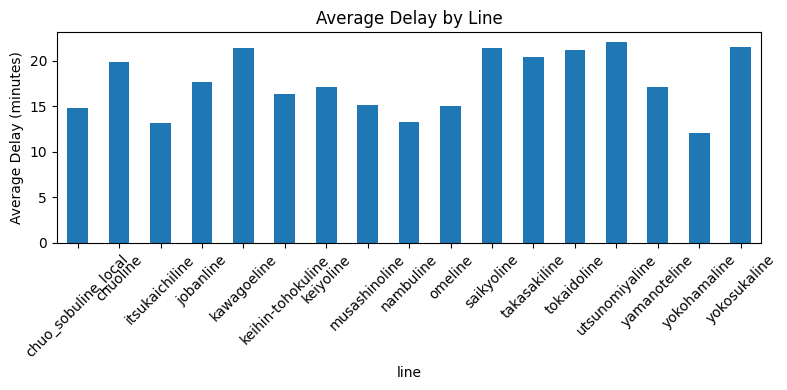


=== Pivot Table (日付×路線の最大遅延) ===
line         chuo_sobuline_local  chuoline  itsukaichiline  jobanline  \
parsed_date                                                             
2025-01-01                  10.0      40.0            10.0       30.0   
2025-01-02                  30.0      60.0             NaN       10.0   
2025-01-03                  30.0      30.0             NaN       20.0   
2025-01-04                  20.0      10.0             NaN       10.0   
2025-01-05                  10.0      20.0             NaN       10.0   

line         kawagoeline  keihin-tohokuline  keiyoline  musashinoline  \
parsed_date                                                             
2025-01-01          30.0               20.0       61.0            NaN   
2025-01-02          30.0               20.0       10.0            NaN   
2025-01-03          61.0               40.0       10.0           20.0   
2025-01-04          10.0               10.0       40.0           50.0   
2025-01-05      

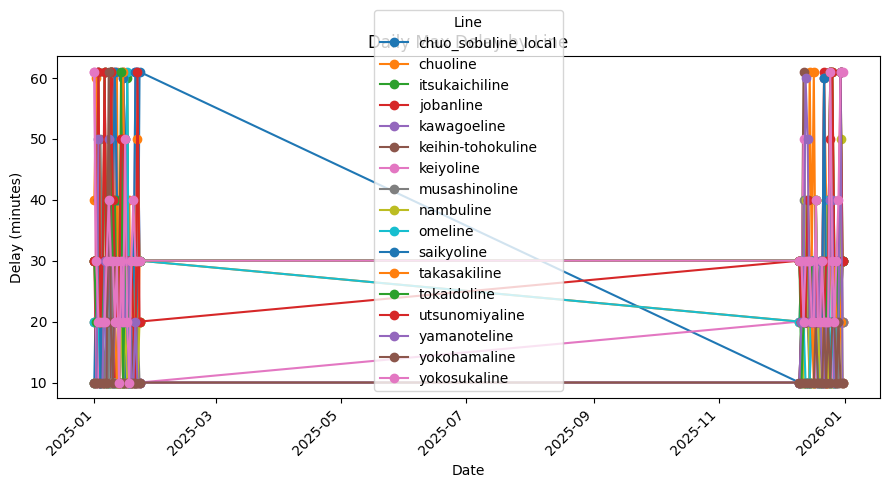

In [48]:
# In[3]: 分析用のコード(グラフ表示など)

import matplotlib.pyplot as plt

def compare_line_average_delay(df):
    """
    路線(line)別に parsed_delay の平均を棒グラフで可視化
    """
    # NaN除外
    valid_df = df.dropna(subset=["parsed_delay"])
    line_mean = valid_df.groupby("line")["parsed_delay"].mean()
    
    line_mean.plot(kind="bar", figsize=(8,4))
    plt.ylabel("Average Delay (minutes)")
    plt.title("Average Delay by Line")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def pivot_line_delay(df):
    """
    日付×路線 のピボットテーブル (例: 最大遅延)
    """
    valid_df = df.dropna(subset=["parsed_delay"])
    pivot_df = pd.pivot_table(
        valid_df,
        index="parsed_date",
        columns="line",
        values="parsed_delay",
        aggfunc="max"  # max or meanなど
    )
    return pivot_df

def plot_pivot_line_delay(pivot_df):
    """
    ピボットテーブルを折れ線グラフにして、路線ごとの遅延推移を比較
    """
    pivot_df.plot(kind="line", marker="o", figsize=(9,5))
    plt.xlabel("Date")
    plt.ylabel("Delay (minutes)")
    plt.title("Daily Max Delay by Line")
    plt.xticks(rotation=45)
    plt.legend(title="Line")
    plt.tight_layout()
    plt.show()

# 実際に分析コードを呼び出してみる
compare_line_average_delay(df)

pivot_df = pivot_line_delay(df)
print("\n=== Pivot Table (日付×路線の最大遅延) ===")
print(pivot_df.head())

plot_pivot_line_delay(pivot_df)
